# RRN, LSTM & GRU Model

- Newyork Taxi Dataset

In [ ]:
'''The taxi dataset consists of records containing information about taxi trips, such as vendor IDs, 
pickup and dropoff datetimes, passenger counts, and geographic coordinates (longitude and latitude) for both pickup 
and dropoff locations. Additionally, the dataset includes a "store_and_fwd_flag" indicating whether 
the trip data was stored in the vehicle before forwarding. This dataset is typically used for tasks 
like predicting trip duration or analyzing taxi ride patterns.'''

'The taxi dataset consists of records containing information about taxi trips, such as vendor IDs, \npickup and dropoff datetimes, passenger counts, and geographic coordinates (longitude and latitude) for both pickup \nand dropoff locations. Additionally, the dataset includes a "store_and_fwd_flag" indicating whether \nthe trip data was stored in the vehicle before forwarding. This dataset is typically used for tasks \nlike predicting trip duration or analyzing taxi ride patterns.'

### Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

### Step 2: Data Preparation

In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,18.556429,18.685356,18.299286,18.303213,16.067413,262620400
1,2013-11-08,18.377857,18.611786,18.306786,18.591429,16.320423,279316800
2,2013-11-11,18.571072,18.631071,18.371786,18.537500,16.273079,227452400
3,2013-11-12,18.488214,18.711430,18.464287,18.571787,16.303186,204276800
4,2013-11-13,18.500000,18.651787,18.462856,18.593929,16.322620,197220800
...,...,...,...,...,...,...,...
2511,2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2512,2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900
2513,2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2514,2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700


In [ ]:
# Assuming you want to predict the 'passenger_count'

data = df["passenger_count"].values

In [ ]:
data

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
data.reshape(-1, 1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

### Step 3: Data Preprocessing

In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

sequence_length = 5  # Adjust this as needed
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

### Step 4: Build and Train RNN Model

In [ ]:
model_rnn = keras.Sequential(name="RNN")
model_rnn.add(keras.layers.SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_rnn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

### Step 5: Build and Train LSTM Model

In [ ]:
model_lstm = keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

### Step 6: Build and Train GRU Model

In [ ]:
model_gru = keras.Sequential(name="GRU")
model_gru.add(keras.layers.GRU(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_gru.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

### Step 7: Evaluate the models

In [ ]:
def evaluate_model(model, X_test, y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_pred = model.predict(X_test_reshaped)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_rnn = evaluate_model(model_rnn, X_test, y_test)
mse_lstm = evaluate_model(model_lstm, X_test, y_test)
mse_gru = evaluate_model(model_gru, X_test, y_test)

print(f"RNN Mean Squared Error: {mse_rnn}")
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"GRU Mean Squared Error: {mse_gru}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RNN Mean Squared Error: 1.7095469339183618
LSTM Mean Squared Error: 1.6712431099996683
GRU Mean Squared Error: 1.6723658351244743


### Step 8: Visualization

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


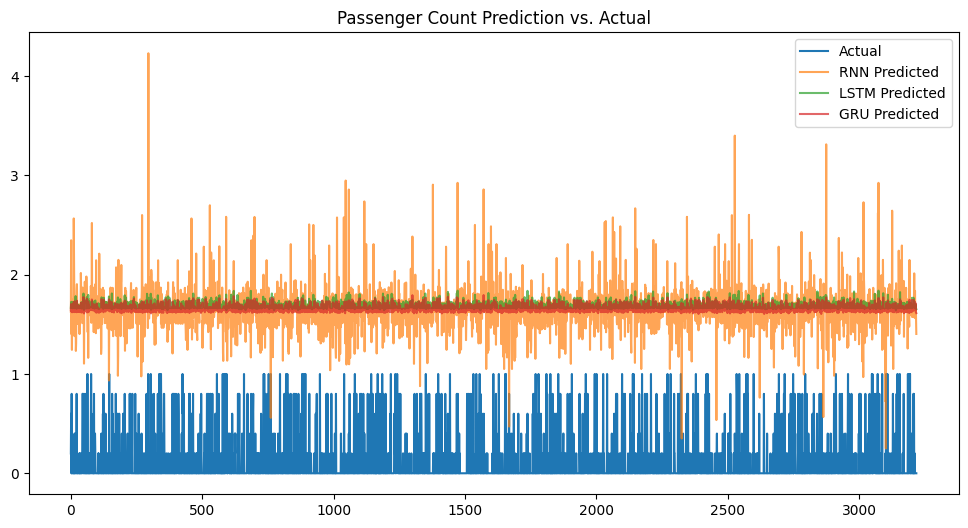

In [ ]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Passenger Count Prediction vs. Actual')
plt.show()